**ANN using random seeds**

---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf


In [ ]:
# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5024 - loss: 0.7316
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.6529 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7015 - loss: 0.6001 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.5579 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.5200 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.4835 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8842 - loss: 0.4490 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.4169  
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 0.3883 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8804 - loss: 0.3641 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8862 - loss: 0.3437 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
ANN Model Accuracy: 90.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.86      0.90      0.88        21

    accuracy                           0.91        54
   macro avg       0.90      0.91      0.90        54
weighted avg       0.91      0.91      0.91        54



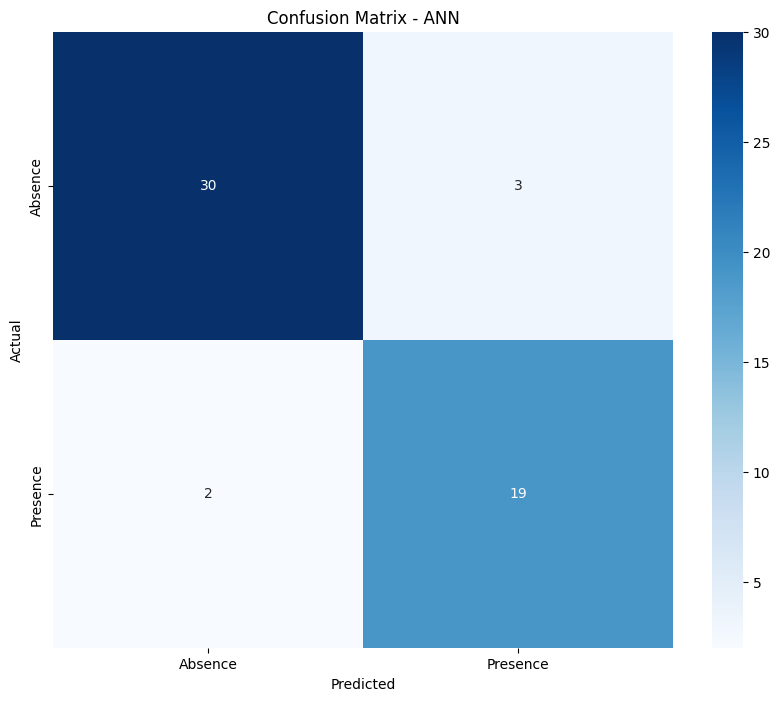

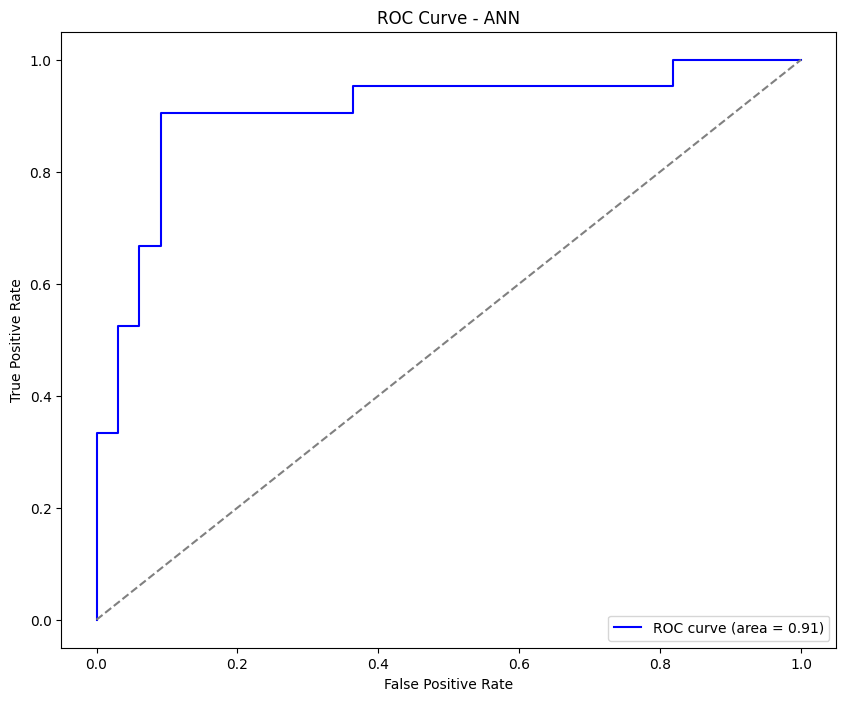

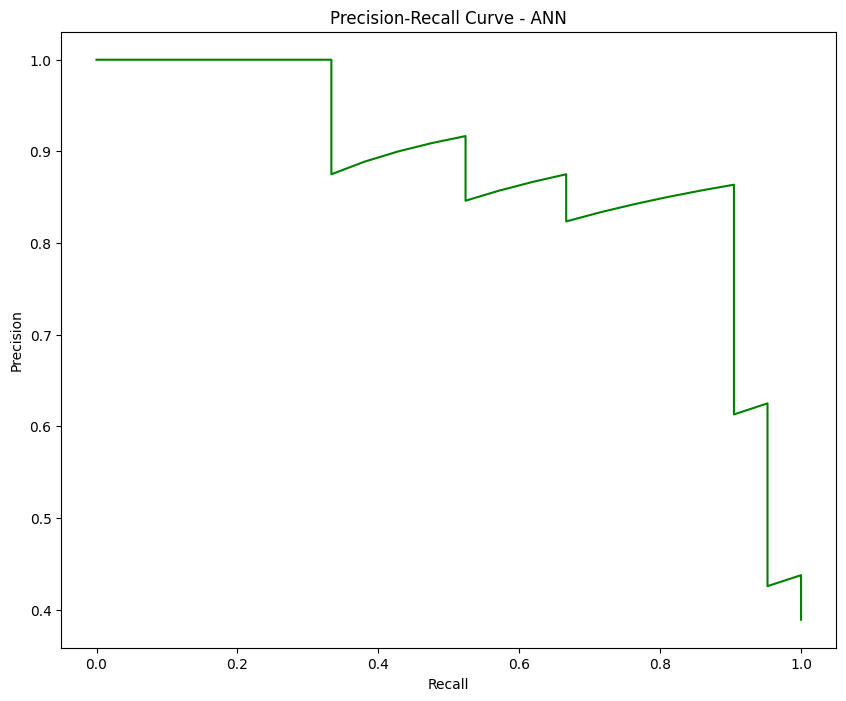

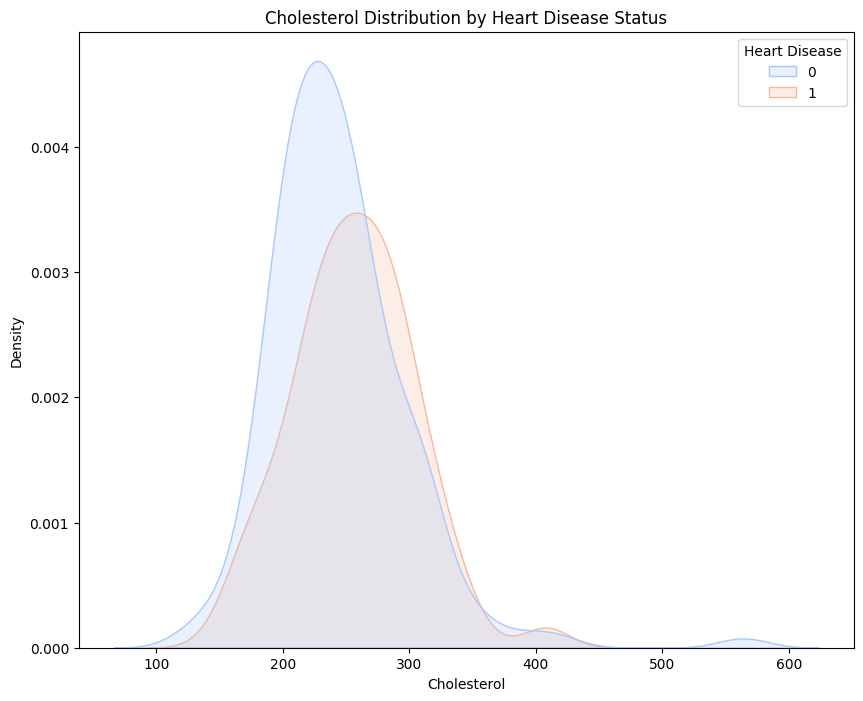

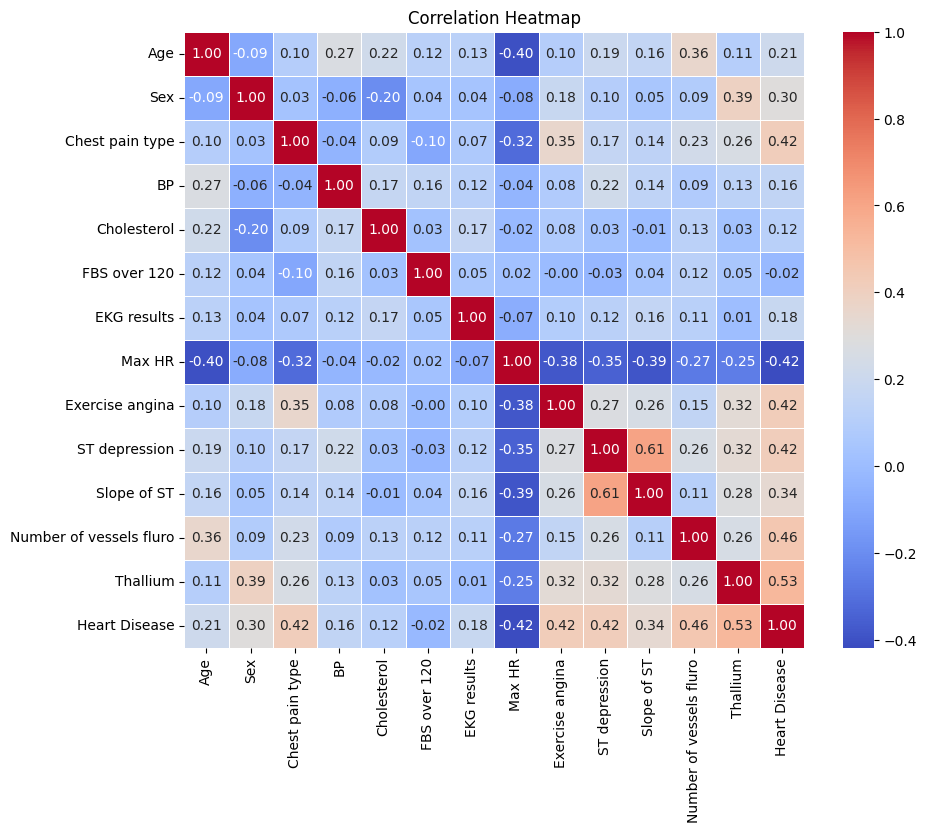

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and build the ANN model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Make predictions on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - ANN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ANN')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Navie baysee**

---


Naive Bayes Model Accuracy: 90.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



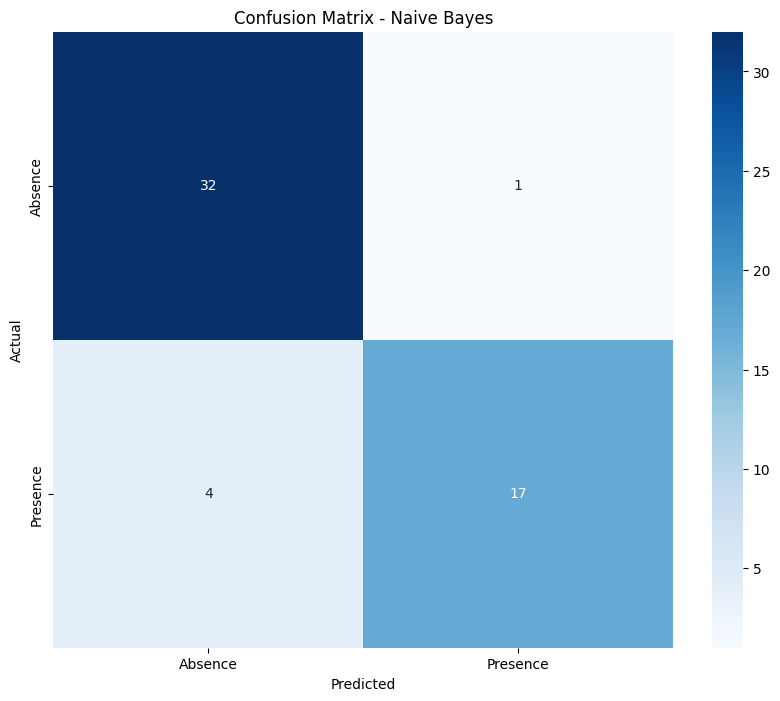

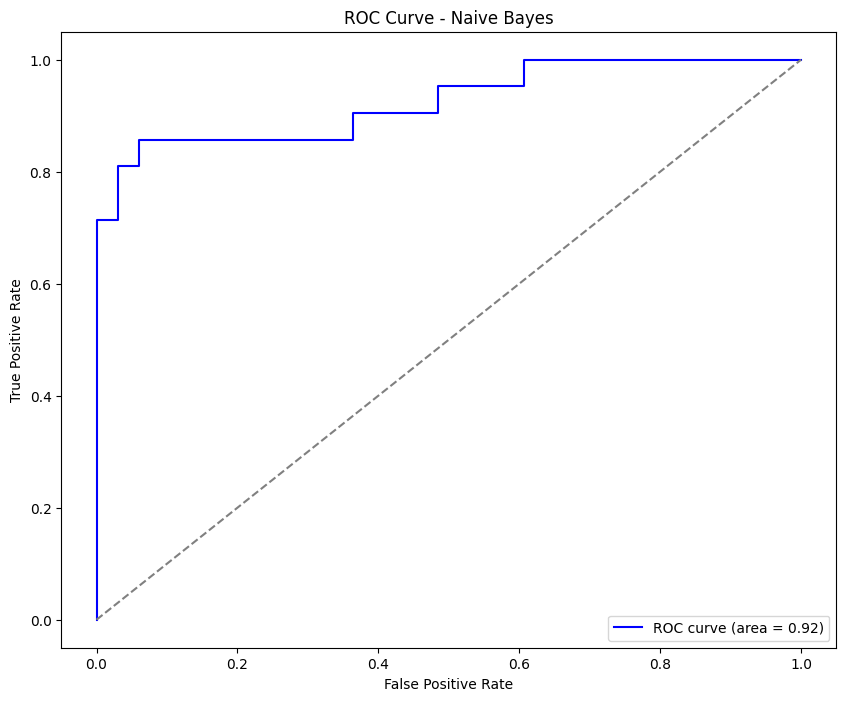

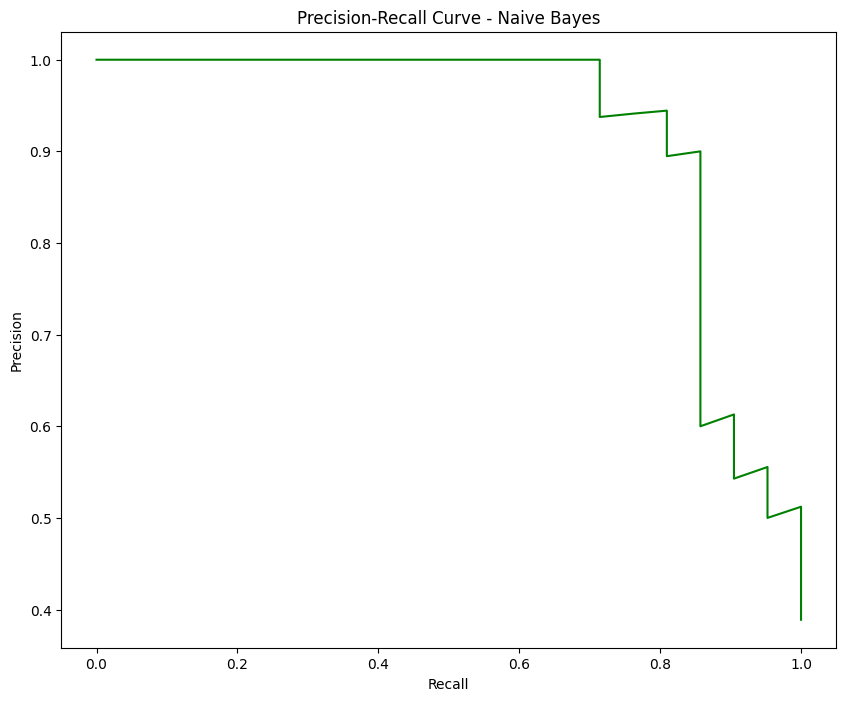

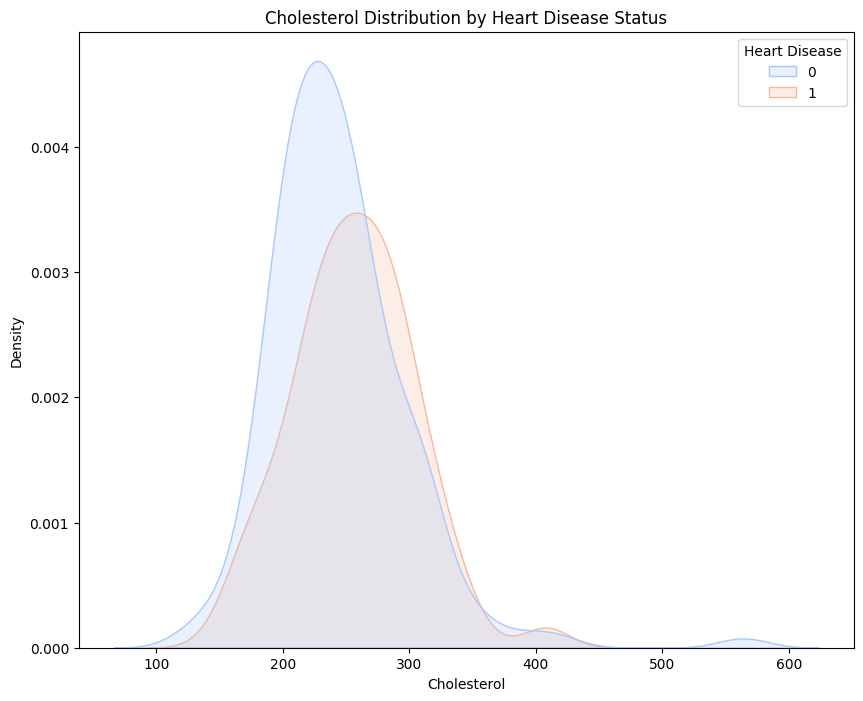

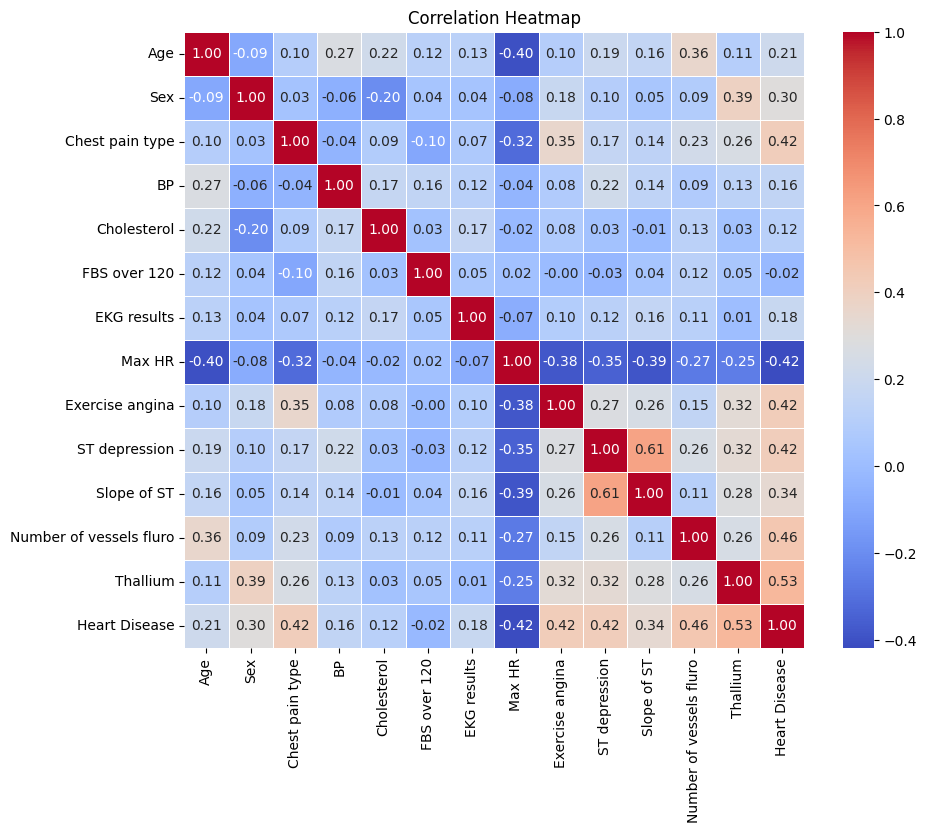

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Set random seeds for reproducibility
np.random.seed(42)

# Load the dataset
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Absence', 'Presence'], yticklabels=['Absence', 'Presence'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
y_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

# Cholesterol Distribution by Heart Disease Status (assuming 'Cholesterol' exists in the dataset)
if 'Cholesterol' in data.columns:
    plt.figure(figsize=(10, 8))
    sns.kdeplot(data=data, x='Cholesterol', hue='Heart Disease', fill=True, palette='coolwarm')
    plt.title('Cholesterol Distribution by Heart Disease Status')
    plt.xlabel('Cholesterol')
    plt.ylabel('Density')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

 Heart Disease Prediction using LightGBM **algorithm**

---



In [ ]:
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# Preprocessing
# Encode the target variable 'Heart Disease' (Presence=1, Absence=0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Define features X and target y
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC and Precision-Recall curve

In [ ]:
# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LightGBM Model Accuracy: {accuracy * 100:.2f}%")

LightGBM Model Accuracy: 83.33%


Hyperparameter Tuning for XGBoost using RandomizedSearchCV

---

**bold text**

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Accuracy: 82.72%
              precision    recall  f1-score   support

           0       0.79      0.98      0.87        49
           1       0.95      0.59      0.73        32

    accuracy                           0.83        81
   macro avg       0.87      0.79      0.80        81
weighted avg       0.85      0.83      0.82        81



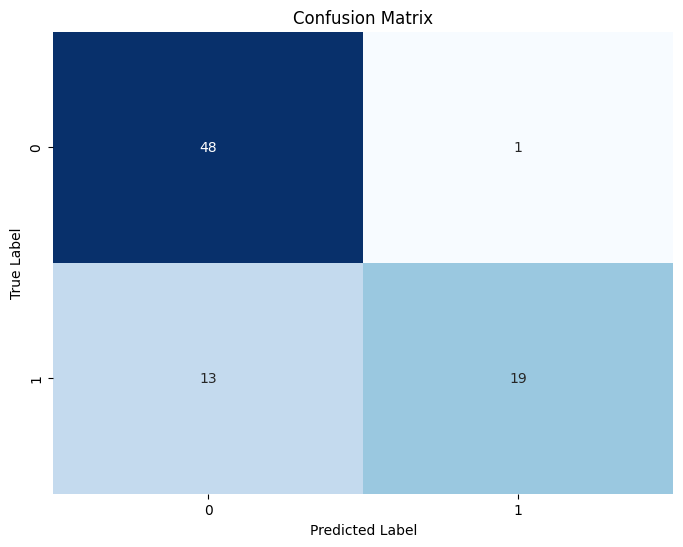

In [ ]:
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Step 5: Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Heart Disease'])  # 'Heart Disease' is the actual target column name
y = data['Heart Disease']

# Step 6: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Step 8: Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# Using RandomizedSearchCV for faster hyperparameter search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='accuracy',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Step 9: Fit the model
random_search.fit(X_train, y_train)

# Step 10: Get the best model and evaluate it
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# ----- Confusion Matrix Code -----
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Logistic Regression with Hyperparameter **Tuning**

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'Heart_Disease_Prediction.csv'
data = pd.read_csv(file_path)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 82.72%
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        49
           1       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81



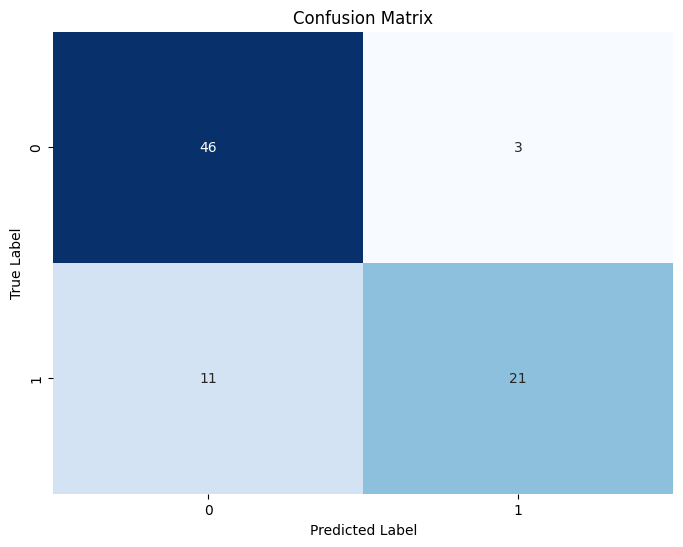

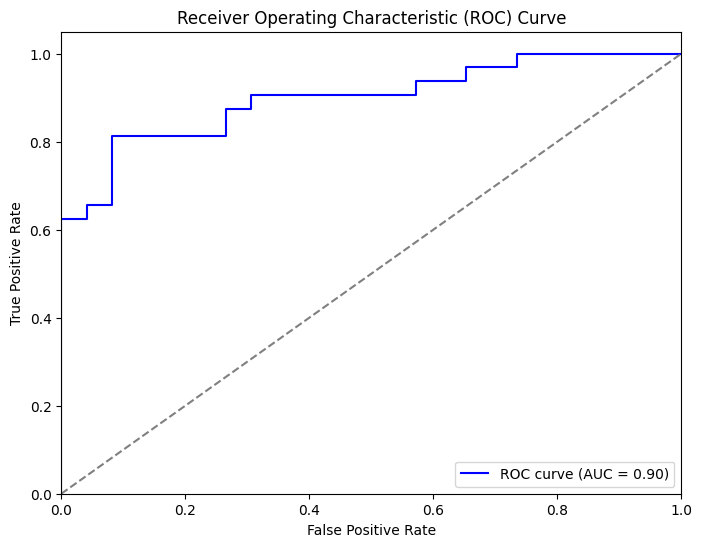

In [ ]:
# Step 4: Encode categorical columns if present
from sklearn.preprocessing import LabelEncoder
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Step 5: Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Heart Disease'])  # 'Heart Disease' is the actual target column name
y = data['Heart Disease']

# Step 6: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Initialize Logistic Regression with hyperparameter tuning
logreg = LogisticRegression(solver='liblinear')

# Define hyperparameters for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 or L2 regularization
}

# Step 9: GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Step 10: Get the best model and evaluate it
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

# ----- Confusion Matrix Code -----
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ----- ROC Curve Code -----
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()